In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import string
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
df = pd.read_csv("/kaggle/input/real-and-fake-news-dataset/news.csv")
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
df = df.drop(df.columns[0], axis=1)
df['combined_text'] = df['title'] + " " + df['text'] 
df["label"] = df["label"].apply(lambda x: 0 if x == "FAKE" else 1)
df.head()

,title,text,label,combined_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,You Can Smell Hillary’s Fear Daniel Greenfield...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,Watch The Exact Moment Paul Ryan Committed Pol...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,Kerry to go to Paris in gesture of sympathy U....
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,Bernie supporters on Twitter erupt in anger ag...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,The Battle of New York: Why This Primary Matte...


In [4]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
# Define stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to clean and preprocess text
def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)                   # Remove HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text)              # Keep only letters
    text = text.lower()                                 # Convert to lowercase
    tokens = nltk.word_tokenize(text)                   # Tokenize text
    tokens = [lemmatizer.lemmatize(w) for w in tokens 
              if w not in stop_words and w not in string.punctuation]  # Remove stopwords and punctuation
    return ' '.join(tokens)

# Apply preprocessing function to text
df['clean_text'] = df['combined_text'].apply(preprocess_text)

# Ensure labels are categorical integers
df['label'] = df['label'].astype('category').cat.codes

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text to TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['label']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Choose one classifier
clf = LogisticRegression(max_iter=1000)
# clf = RandomForestClassifier()
# clf = LinearSVC()

# Train and evaluate
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Show performance report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       628
           1       0.92      0.90      0.91       639

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267



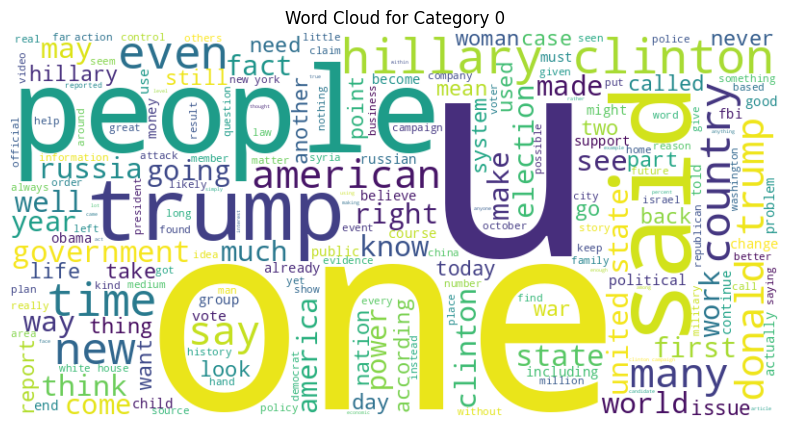

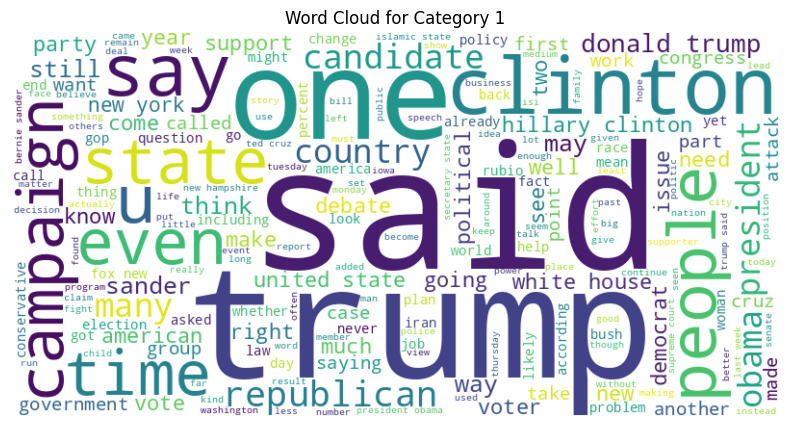

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate and display word cloud for each label
for label in df['label'].unique():
    text = ' '.join(df[df['label'] == label]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Category {label}")
    plt.show()